In [1]:
import wispshapes as shapes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
%matplotlib inline

#### Let's load in some data taken from https://bit.ly/2Rb8LtL

In [2]:
x = np.array([201, 201, 287, 166,  58, 157, 146, 218, 203, 186, 160,  47, 210,
       131, 202, 125, 158, 198, 165, 244])
y = np.array([592, 442, 402, 400, 173, 317, 344, 533, 495, 423, 337, 583, 479,
       311, 504, 334, 416, 510, 393, 401])
sigma_y = np.array([61, 25, 15, 34, 15, 52, 22, 16, 21, 42, 31, 38, 27, 16, 14, 26, 16,
       30, 14, 25])

mu=np.nanmean(y)
sigma=np.nanstd(y)
sigma_y_gaussian= np.random.normal(mu, sigma, len(y))

data=pd.DataFrame([x, y, np.zeros(len(x)), sigma_y ]).transpose()

#### Now create a box around that data by fitting a line to the data 

In [3]:
b=shapes.Box()
b.data=data

In [4]:
print ('vertices: {} '.format(np.round(b.vertices, 1)))
print ('length : {}'.format(len(b)))
print ('angle : {}'.format(b.angle))
print ('completeness: {}'.format(b.efficiency))
print ('scatter: {}'.format(b.scatter))
print ('coefficients: {}'.format(b.coeffs))

vertices: [[ 47.  411.9]
 [287.  670.3]
 [287.  374.3]
 [ 47.  115.9]
 [ 47.  411.9]] 
length : 20
angle : 0.822336988825445
completeness: 0.85
scatter: 148.00460018832788
coefficients: [  1.07674752 213.27349198]


In [5]:
b.angle*57.2958

47.11645564434493

selfcolor #01FF70


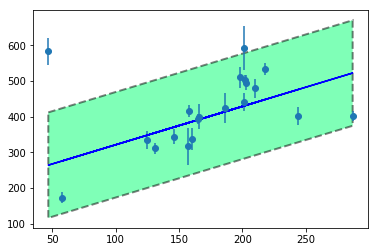

In [6]:
fig, ax=plt.subplots()
b.alpha=0.5
b.color="#01FF70"
ax.errorbar(x, y, sigma_y, fmt = "o")
b.plot(ax=ax, only_shape=True, size=4)
line=np.poly1d(b.coeffs)
plt.plot(b.data[0], line(b.data[0]), 'b')

#### what if I the data had gaussian errorbars

In [7]:
bx=shapes.Box()
bx.data=pd.DataFrame([x, y, np.zeros(len(x)), sigma_y_gaussian ]).transpose()

selfcolor #01FF70
selfcolor #0074D9


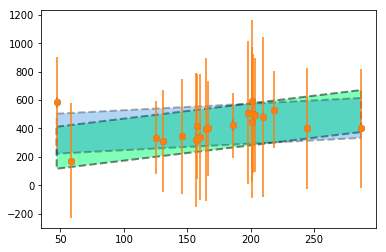

In [9]:
fig, ax=plt.subplots()
bx.color="#0074D9"
ax.errorbar(x, y, sigma_y, fmt = "o")
ax.errorbar(x, y, sigma_y_gaussian, fmt = "o")
b.plot(ax=ax, only_shape=True, size=4)
bx.plot(ax=ax, only_shape=True, size=4)

#### Selection

(2, 17) (17, 2)
selfcolor #01FF70


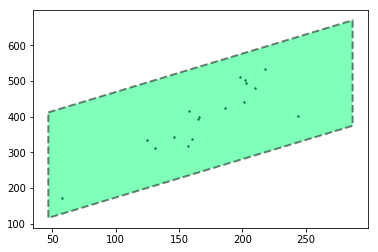

In [10]:
#with an array
s1=b.select(b.data)
#with a pandas datafrane
d=pd.DataFrame(b.data).transpose()
s2=b.select(d)
print (s1.shape, s2.shape)
fig, ax=plt.subplots()
b.plot(ax=ax)
ax.scatter(s1[0], s1[1], c='k', s=2)

Checking points in the box

In [11]:
b.contains([(0, 3), (0.5, 1)])

[False, False]

Rotations

In [14]:
import copy
b2=copy.deepcopy(b)
b2.rotate(np.pi/2)
b2.color="#B10DC9"
b3=copy.deepcopy(b)
b3.color='#39CCCC'
b3.rotate(np.pi/2-b.angle)
b4=shapes.Box()
b4.scatter_coeff=5.0
b4.alpha=0.3
b4.data=sns.load_dataset('iris')

selfcolor #B10DC9
selfcolor #39CCCC
selfcolor None
selfcolor #01FF70
angles 0.822336988825445 0.7484593379694515
reminder : axes scales are not the same


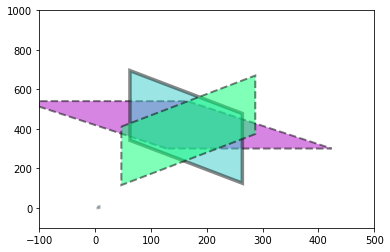

In [15]:
fig, ax=plt.subplots()
ax.set_xlim(-100, 500.0)
ax.set_ylim(-100, 1000.0)
b2.plot()
#b.plot(only_shape=False, size=3, label='two')
b3.plot(highlight=True) #highlight one of the boxes
b4.plot(highlight=False) #highlight one of the boxes
b.plot(highlight=False) #highlight one of the boxes

print ('angles {} {}'.format(b.angle, b2.angle))
print ('reminder : axes scales are not the same')